In [ ]:
"""
  The code here has been inspired by

  PySpark Cookbook:
  Over 60 recipes for implementing big data processing and analytics using
  Apache Spark and Python
"""

# Data Modeling & Exploratory Data Analysis

In [ ]:
!pip install pyspark


In [ ]:
import pyspark
print(pyspark.__version__)


3.5.4


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ColabPySpark") \
    .master("local[*]") \
    .getOrCreate()

print("Spark is running:", spark.version)


Spark is running: 3.5.4


In [ ]:
# # Get Spark context
sc = spark.sparkContext

print(f"Spark UI: {sc.uiWebUrl}")  # Check Spark UI link
print(f"Spark Version: {sc.version}")

Spark UI: http://a27eedf0b1d0:4040
Spark Version: 3.5.4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
## Create flights RDD
flightsRDD = sc.textFile('/content/drive/My Drive/Pyspark/data/departure_delays.csv')\
.map(lambda line: line.split(",")).zipWithIndex()\
.filter(lambda row_idx: row_idx[1] > 0)\
.map(lambda row_idx: row_idx[0])

Create our data :

In [ ]:
dirty_data = spark.createDataFrame([
          (1,'Porsche','Boxster S','Turbo',2.5,4,22,None)
        , (2,'Aston Martin','Vanquish','Aspirated',6.0,12,16,None)
        , (3,'Porsche','911 Carrera 4S Cabriolet','Turbo',3.0,6,24,None)
        , (3,'General Motors','SPARK ACTIV','Aspirated',1.4,None,32,None)
        , (5,'BMW','COOPER S HARDTOP 2 DOOR','Turbo',2.0,4,26,None)
        , (6,'BMW','330i','Turbo',2.0,None,27,None)
        , (7,'BMW','440i Coupe','Turbo',3.0,6,23,None)
        , (8,'BMW','440i Coupe','Turbo',3.0,6,23,None)
        , (9,'Mercedes-Benz',None,None,None,None,27,None)
        , (10,'Mercedes-Benz','CLS 550','Turbo',4.7,8,21,79231)
        , (11,'Volkswagen','GTI','Turbo',2.0,4,None,None)
        , (12,'Ford Motor Company','FUSION AWD','Turbo',2.7,6,20,None)
        , (13,'Nissan','Q50 AWD RED SPORT','Turbo',3.0,6,22,None)
        , (14,'Nissan','Q70 AWD','Aspirated',5.6,8,18,None)
        , (15,'Kia','Stinger RWD','Turbo',2.0,4,25,None)
        , (16,'Toyota','CAMRY HYBRID LE','Aspirated',2.5,4,46,None)
        , (16,'Toyota','CAMRY HYBRID LE','Aspirated',2.5,4,46,None)
        , (18,'FCA US LLC','300','Aspirated',3.6,6,23,None)
        , (19,'Hyundai','G80 AWD','Turbo',3.3,6,20,None)
        , (20,'Hyundai','G80 AWD','Turbo',3.3,6,20,None)
        , (21,'BMW','X5 M','Turbo',4.4,8,18,121231)
        , (22,'GE','K1500 SUBURBAN 4WD','Aspirated',5.3,8,18,None)
    ], ['Id','Manufacturer','Model','EngineType','Displacement',
        'Cylinders','FuelEconomy','MSRP'])

In [ ]:
dirty_data.show()

+---+------------------+--------------------+----------+------------+---------+-----------+-----+
| Id|      Manufacturer|               Model|EngineType|Displacement|Cylinders|FuelEconomy| MSRP|
+---+------------------+--------------------+----------+------------+---------+-----------+-----+
|  1|           Porsche|           Boxster S|     Turbo|         2.5|        4|         22| NULL|
|  2|      Aston Martin|            Vanquish| Aspirated|         6.0|       12|         16| NULL|
|  3|           Porsche|911 Carrera 4S Ca...|     Turbo|         3.0|        6|         24| NULL|
|  3|    General Motors|         SPARK ACTIV| Aspirated|         1.4|     NULL|         32| NULL|
|  5|               BMW|COOPER S HARDTOP ...|     Turbo|         2.0|        4|         26| NULL|
|  6|               BMW|                330i|     Turbo|         2.0|     NULL|         27| NULL|
|  7|               BMW|          440i Coupe|     Turbo|         3.0|        6|         23| NULL|
|  8|               

Check for duplicate values:

In [ ]:
dirty_data.count(), dirty_data.distinct().count()

(22, 21)

In [ ]:
dirty_data.count()

22

In [ ]:
dirty_data.distinct().count()

21

In [ ]:
#Remove duplicates
full_removed = dirty_data.dropDuplicates()

In [ ]:
#Finding the duplicate row

In [ ]:
(
dirty_data
.groupby(dirty_data.columns)
.count()
.filter('count > 1')
.show()
)

+---+------------+---------------+----------+------------+---------+-----------+----+-----+
| Id|Manufacturer|          Model|EngineType|Displacement|Cylinders|FuelEconomy|MSRP|count|
+---+------------+---------------+----------+------------+---------+-----------+----+-----+
| 16|      Toyota|CAMRY HYBRID LE| Aspirated|         2.5|        4|         46|NULL|    2|
+---+------------+---------------+----------+------------+---------+-----------+----+-----+



We use this code is used to **detect duplicate rows** in a PySpark DataFrame (`dirty_data`).

1. **`groupby(dirty_data.columns)`**  
   - Groups the data by **all columns**, meaning identical rows will be grouped together.

2. **`.count()`**  
   - Counts how many times each unique row appears in the dataset.

3. **`.filter('count > 1')`**  
   - Filters out groups where the count is **greater than 1**, meaning the row appears more than once (duplicates).

4. **`.show()`**  
   - Displays the duplicate rows along with their count.

---


In [ ]:
# remove the duplicated rows
full_removed = dirty_data.dropDuplicates()
full_removed.count()

21

In [ ]:
# count of rows
no_ids = (
    full_removed
    .select([col for col in full_removed.columns if col != 'Id'])
)

no_ids.count(), no_ids.distinct().count()

(21, 19)

In [ ]:
# we first group by all the columns but we exclude the 'Id'
# column, then count how many records we get given from this grouping, and
# finally we extract those with 'count > 1' and show them on the screen.

In [ ]:
id_removed = full_removed.dropDuplicates(
                      subset = [col for col in full_removed.columns if col != 'Id'])

In [ ]:
id_removed.count()

19

In [ ]:
import pyspark.sql.functions as fn

id_removed.agg(fn.count('Id').alias('CountOfIDs')
, fn.countDistinct('Id').alias('CountOfDistinctIDs')).show()

+----------+------------------+
|CountOfIDs|CountOfDistinctIDs|
+----------+------------------+
|        19|                18|
+----------+------------------+



In [ ]:
id_removed.groupby('Id').count().filter('count > 1').show()

+---+-----+
| Id|count|
+---+-----+
|  3|    2|
+---+-----+



In [ ]:
#let's see record with duplicate id
id_removed.filter('Id = 3').show()

+---+--------------+--------------------+----------+------------+---------+-----------+----+
| Id|  Manufacturer|               Model|EngineType|Displacement|Cylinders|FuelEconomy|MSRP|
+---+--------------+--------------------+----------+------------+---------+-----------+----+
|  3|General Motors|         SPARK ACTIV| Aspirated|         1.4|     NULL|         32|NULL|
|  3|       Porsche|911 Carrera 4S Ca...|     Turbo|         3.0|        6|         24|NULL|
+---+--------------+--------------------+----------+------------+---------+-----------+----+



In [ ]:
# These are definitely not the same records but they share the same ID. In this
# situation, we can create a new ID that will be unique (we have already made
# sure we do not have other duplicates in our dataset). PySpark's SQL
# functions module offers a .monotonically_increasing_id() method that creates a
# unique stream of IDs.

In [ ]:
# The .monotonically_increasing_id() —generated ID is guaranteed to be unique as long as
# your data lives in less than one billion partitions and with less than eight billion records
# in each.

In [ ]:
#Generate new column Id
new_id = (
    id_removed
    .select(
        [fn.monotonically_increasing_id().alias('Id')] +
        [col for col in id_removed.columns if col != 'Id'])
)

new_id.show()

+---+------------------+--------------------+----------+------------+---------+-----------+------+
| Id|      Manufacturer|               Model|EngineType|Displacement|Cylinders|FuelEconomy|  MSRP|
+---+------------------+--------------------+----------+------------+---------+-----------+------+
|  0|     Mercedes-Benz|             CLS 550|     Turbo|         4.7|        8|         21| 79231|
|  1|               BMW|                X5 M|     Turbo|         4.4|        8|         18|121231|
|  2|    General Motors|         SPARK ACTIV| Aspirated|         1.4|     NULL|         32|  NULL|
|  3|     Mercedes-Benz|                NULL|      NULL|        NULL|     NULL|         27|  NULL|
|  4|               BMW|COOPER S HARDTOP ...|     Turbo|         2.0|        4|         26|  NULL|
|  5|      Aston Martin|            Vanquish| Aspirated|         6.0|       12|         16|  NULL|
|  6|        Volkswagen|                 GTI|     Turbo|         2.0|        4|       NULL|  NULL|
|  7|     

## Missing Values

Check the percentage of data missing in each row:

In [ ]:
(
    spark.createDataFrame(  # Create a new DataFrame
        new_id.rdd.map(  # Convert `new_id` DataFrame to RDD for row-wise operations
           lambda row: (
                 row['Id'],  # Keep the 'Id' column
               sum([c == None for c in row])  # Count the number of None values in the row
           )
        )
        .filter(lambda el: el[1] > 1)  # Keep only rows where more than 1 value is missing
        .collect()  # Collect results into a list (needed to create DataFrame)
        ,['Id', 'CountMissing']  # Define column names for the new DataFrame
    )
    .orderBy('CountMissing', ascending=False)  # Sort rows by the number of missing values (descending)
    .show()  # Display the output
)

+---+------------+
| Id|CountMissing|
+---+------------+
|  3|           5|
|  6|           2|
|  2|           2|
|  7|           2|
+---+------------+



We check for missing values (`None`) in a DataFrame and counting them for each row. It then creates a new DataFrame with the count of missing values per row, orders it in descending order, and displays the result.

---

1. **Convert DataFrame to RDD**
   ```python
   new_id.rdd.map(lambda row: (...))
   ```
   - Each row is processed as a **Python object** instead of a Spark DataFrame row.
   - This is done because PySpark DataFrames don't support direct row-wise operations like `sum()`.

2. **Count Missing Values (`None`)**
   ```python
   sum([c == None for c in row])
   ```
   - This creates a list comprehension `[c == None for c in row]`, which results in:
     ```python
     [False, True, False, True]  # Example row with 2 missing values
     ```
   - The `sum()` function counts the number of `True` values (which represent `None` values).

3. **Keep Only Rows With More Than 1 Missing Value**
   ```python
   .filter(lambda el: el[1] > 1)
   ```
   - The first element (`el[0]`) is `Id`, and the second (`el[1]`) is the count of missing values.
   - This removes rows with **1 or 0 missing values**.

4. **Convert RDD Back to DataFrame**
   ```python
   spark.createDataFrame(..., ['Id', 'CountMissing'])
   ```
   - The resulting data is converted back into a **DataFrame**.

5. **Sort by Missing Values (Descending)**
   ```python
   .orderBy('CountMissing', ascending=False)
   ```
   - Ensures that rows with the **most missing values appear first**.

6. **Show the Final Output**
   ```python
   .show()
   ```
   - Displays the DataFrame.

In [ ]:
merc_out = new_id.dropna(thresh=4)
new_id.count(), merc_out.count()

(19, 18)

Check the percentage of data missing in each column:

In [ ]:
for k, v in sorted(
    merc_out.agg(*[
               (1 - (fn.count(c) / fn.count('*')))  # Compute missing value percentage for each column
                    .alias(c + '_miss')  # Rename the output column
               for c in merc_out.columns  # Loop through all columns in the DataFrame
           ])
        .collect()[0]  # Get the first row from the aggregated DataFrame
        .asDict()  # Convert row object to dictionary {column_name: missing_percentage}
        .items()  # Convert dictionary to list of (column_name, missing_percentage) tuples
    , key=lambda el: el[1]  # Sort by the missing percentage
    , reverse=True  # Sort in descending order
):
    print(k, v)  # Print column name and missing percentage


MSRP_miss 0.8888888888888888
Cylinders_miss 0.11111111111111116
FuelEconomy_miss 0.05555555555555558
Id_miss 0.0
Manufacturer_miss 0.0
Model_miss 0.0
EngineType_miss 0.0
Displacement_miss 0.0


In [ ]:
# most of the information in the MSRP column is missing.
# Thus, we can drop it, as it will not bring us any useful information:

no_MSRP = merc_out.select([col for col in new_id.columns if col != 'MSRP'])

### Fill missing values




In [ ]:
multipliers = (
    no_MSRP
    .agg(
          fn.mean(
              fn.col('FuelEconomy') /
              (
                  fn.col('Displacement') * fn.col('Cylinders')
              )
          ).alias('FuelEconomy')
        , fn.mean(
            fn.col('Cylinders') /
            fn.col('Displacement')
        ).alias('Cylinders')
    )
).toPandas().to_dict('records')[0]

multipliers

{'FuelEconomy': 1.4957485048359977, 'Cylinders': 1.8353365984789107}


#### **1️⃣ Compute Aggregated Ratios**
```python
fn.mean(
    fn.col('FuelEconomy') /
    (
        fn.col('Displacement') * fn.col('Cylinders')
    )
).alias('FuelEconomy')
```
- Computes the **mean** of `FuelEconomy / (Displacement × Cylinders)`.
- This creates a new **FuelEconomy multiplier**.

```python
fn.mean(
    fn.col('Cylinders') /
    fn.col('Displacement')
).alias('Cylinders')
```
- Computes the **mean** of `Cylinders / Displacement`.
- This creates a new **Cylinders multiplier**.

---
#### **2️⃣ Convert to Pandas Dictionary**
```python
.toPandas().to_dict('records')[0]
```
- **Converts the Spark DataFrame to Pandas** using `.toPandas()`.
- **Converts the single-row Pandas DataFrame into a dictionary** using `.to_dict('records')`.

In [ ]:
imputed = (
    no_MSRP
    .withColumn('FuelEconomy', fn.col('FuelEconomy')   / fn.col('Displacement') / fn.col('Cylinders'))
    .withColumn('Cylinders',   fn.col('Cylinders')   / fn.col('Displacement'))
    .fillna(multipliers)
    .withColumn('Cylinders',   (fn.col('Cylinders')   * fn.col('Displacement')).cast('integer'))
    .withColumn('FuelEconomy', fn.col('FuelEconomy') * fn.col('Displacement') * fn.col('Cylinders'))
)

imputed.show()

+---+------------------+--------------------+----------+------------+---------+------------------+
| Id|      Manufacturer|               Model|EngineType|Displacement|Cylinders|       FuelEconomy|
+---+------------------+--------------------+----------+------------+---------+------------------+
|  0|     Mercedes-Benz|             CLS 550|     Turbo|         4.7|        8|              21.0|
|  1|               BMW|                X5 M|     Turbo|         4.4|        8|              18.0|
|  2|    General Motors|         SPARK ACTIV| Aspirated|         1.4|        2|4.1880958135407935|
|  4|               BMW|COOPER S HARDTOP ...|     Turbo|         2.0|        4|              26.0|
|  5|      Aston Martin|            Vanquish| Aspirated|         6.0|       12|              16.0|
|  6|        Volkswagen|                 GTI|     Turbo|         2.0|        4|11.965988038687982|
|  7|               BMW|                330i|     Turbo|         2.0|        3| 8.974491029015986|
|  8|     

## Handling Outliers


In [ ]:
imputed.show()

+---+------------------+--------------------+----------+------------+---------+------------------+
| Id|      Manufacturer|               Model|EngineType|Displacement|Cylinders|       FuelEconomy|
+---+------------------+--------------------+----------+------------+---------+------------------+
|  0|     Mercedes-Benz|             CLS 550|     Turbo|         4.7|        8|              21.0|
|  1|               BMW|                X5 M|     Turbo|         4.4|        8|              18.0|
|  2|    General Motors|         SPARK ACTIV| Aspirated|         1.4|        2|4.1880958135407935|
|  4|               BMW|COOPER S HARDTOP ...|     Turbo|         2.0|        4|              26.0|
|  5|      Aston Martin|            Vanquish| Aspirated|         6.0|       12|              16.0|
|  6|        Volkswagen|                 GTI|     Turbo|         2.0|        4|11.965988038687982|
|  7|               BMW|                330i|     Turbo|         2.0|        3| 8.974491029015986|
|  8|     

In [ ]:
# 1. Let's calculate our ranges first:
features = ['Displacement', 'Cylinders', 'FuelEconomy']
quantiles = [0.25, 0.75]

cut_off_points = []

for feature in features:
    quants = imputed.approxQuantile(feature, quantiles, 0.05)

    IQR = quants[1] - quants[0]
    cut_off_points.append((feature, [
        quants[0] - 1.5 * IQR,
        quants[1] + 1.5 * IQR,
    ]))

    # Print the quantiles for the current feature
    print(f"{feature} quantiles values range: {quants}")

cut_off_points = dict(cut_off_points)


Displacement quantiles values range: [2.0, 3.6]
Cylinders quantiles values range: [4.0, 6.0]
FuelEconomy quantiles values range: [16.0, 23.0]


In [ ]:
quants

[16.0, 23.0]

In [ ]:
cut_off_points

{'Displacement': [-0.40000000000000036, 6.0],
 'Cylinders': [1.0, 9.0],
 'FuelEconomy': [5.5, 33.5]}

Calculate **outlier cut-off points** for `Displacement`, `Cylinders`, and `FuelEconomy` using the **Interquartile Range (IQR) method**.

---
#### **1️⃣ Define Variables**
```python
features = ['Displacement', 'Cylinders', 'FuelEconomy']
quantiles = [0.25, 0.75]
cut_off_points = []
```
- **`features`**: List of numeric columns for outlier detection.
- **`quantiles`**: Selecting **1st quartile (Q1 = 25%)** and **3rd quartile (Q3 = 75%)**.
- **`cut_off_points`**: List to store calculated lower and upper bounds.

---
#### **2️⃣ Compute Quartiles & IQR**
```python
for feature in features:
    quants = imputed.approxQuantile(feature, quantiles, 0.05)
    
    IQR = quants[1] - quants[0]
```
- Uses `approxQuantile()` to **estimate Q1 and Q3**.
- Computes the **Interquartile Range (IQR)**:
  \[
  \text{IQR} = Q3 - Q1
  \]

---
#### **3️⃣ Calculate Outlier Cut-off Points**
```python
cut_off_points.append((feature, [
    quants[0] - 1.5 * IQR,  # Lower bound
    quants[1] + 1.5 * IQR,  # Upper bound
]))
```
- Computes **lower and upper cut-offs**:
  \[
  \text{Lower Bound} = Q1 - 1.5 \times IQR
  \]
  \[
  \text{Upper Bound} = Q3 + 1.5 \times IQR
  \]
- **Outliers** are values **outside** this range.

---
#### **4️⃣ Store Results in a Dictionary**
```python
cut_off_points = dict(cut_off_points)
```
- Converts list to a **dictionary** for easy lookup.

---
### **Final Output Example**
```python
{
    'Displacement': [1.5, 6.5],
    'Cylinders': [2, 8],
    'FuelEconomy': [10, 50]
}
```
This means:
- **Any `Displacement` below 1.5 or above 6.5** is an outlier.
- **Any `Cylinders` below 2 or above 8** is an outlier.
- **Any `FuelEconomy` below 10 or above 50** is an outlier.


In [ ]:
# flag the outliers:

outliers = imputed.select(*['id'] + [
       (
           (imputed[f] < cut_off_points[f][0]) |
           (imputed[f] > cut_off_points[f][1])
       ).alias(f + '_o') for f in features
  ])
outliers.show()

+---+--------------+-----------+-------------+
| id|Displacement_o|Cylinders_o|FuelEconomy_o|
+---+--------------+-----------+-------------+
|  0|         false|      false|        false|
|  1|         false|      false|        false|
|  2|         false|      false|         true|
|  4|         false|      false|        false|
|  5|         false|       true|        false|
|  6|         false|      false|        false|
|  7|         false|      false|        false|
|  8|         false|      false|        false|
|  9|         false|      false|        false|
| 10|         false|      false|        false|
| 11|         false|      false|        false|
| 12|         false|      false|        false|
| 13|         false|      false|        false|
| 14|         false|      false|        false|
| 15|         false|      false|        false|
| 16|         false|      false|        false|
| 17|         false|      false|         true|
| 18|         false|      false|        false|
+---+--------

In [ ]:
# we have two outliers in the fuel economy column

In [ ]:
with_outliers_flag = imputed.join(outliers, on='Id')



In [ ]:
with_outliers_flag.show()

+---+------------------+--------------------+----------+------------+---------+------------------+--------------+-----------+-------------+
| Id|      Manufacturer|               Model|EngineType|Displacement|Cylinders|       FuelEconomy|Displacement_o|Cylinders_o|FuelEconomy_o|
+---+------------------+--------------------+----------+------------+---------+------------------+--------------+-----------+-------------+
|  0|     Mercedes-Benz|             CLS 550|     Turbo|         4.7|        8|              21.0|         false|      false|        false|
|  1|               BMW|                X5 M|     Turbo|         4.4|        8|              18.0|         false|      false|        false|
|  2|    General Motors|         SPARK ACTIV| Aspirated|         1.4|        2|4.1880958135407935|         false|      false|         true|
|  4|               BMW|COOPER S HARDTOP ...|     Turbo|         2.0|        4|              26.0|         false|      false|        false|
|  5|      Aston Mar

In [ ]:
(with_outliers_flag.filter('FuelEconomy_o')\
                        .select('Id', 'Manufacturer', 'Model', 'FuelEconomy').show())

+---+--------------+---------------+------------------+
| Id|  Manufacturer|          Model|       FuelEconomy|
+---+--------------+---------------+------------------+
|  2|General Motors|    SPARK ACTIV|4.1880958135407935|
| 17|        Toyota|CAMRY HYBRID LE|              46.0|
+---+--------------+---------------+------------------+



REmove Outliers:

In [ ]:
no_outliers = (with_outliers_flag.filter('!FuelEconomy_o').select(imputed.columns))

In [ ]:
no_outliers.show()

+---+------------------+--------------------+----------+------------+---------+------------------+
| Id|      Manufacturer|               Model|EngineType|Displacement|Cylinders|       FuelEconomy|
+---+------------------+--------------------+----------+------------+---------+------------------+
|  0|     Mercedes-Benz|             CLS 550|     Turbo|         4.7|        8|              21.0|
|  1|               BMW|                X5 M|     Turbo|         4.4|        8|              18.0|
|  4|               BMW|COOPER S HARDTOP ...|     Turbo|         2.0|        4|              26.0|
|  5|      Aston Martin|            Vanquish| Aspirated|         6.0|       12|              16.0|
|  6|        Volkswagen|                 GTI|     Turbo|         2.0|        4|11.965988038687982|
|  7|               BMW|                330i|     Turbo|         2.0|        3| 8.974491029015986|
|  8|           Porsche|           Boxster S|     Turbo|         2.5|        4|              22.0|
|  9|     

# Making Some Descriptive statistics with Pyspark

In [ ]:
features

['Displacement', 'Cylinders', 'FuelEconomy']

In [ ]:
descriptive_stats = no_outliers.describe(features)

In [ ]:
descriptive_stats.show()

+-------+------------------+-----------------+------------------+
|summary|      Displacement|        Cylinders|       FuelEconomy|
+-------+------------------+-----------------+------------------+
|  count|                16|               16|                16|
|   mean|           3.44375|            6.125|19.600446608398162|
| stddev|1.3549753995306826|2.276693508870558|4.6666477673737505|
|    min|               2.0|                3| 8.974491029015986|
|    max|               6.0|               12|              26.0|
+-------+------------------+-----------------+------------------+



In [ ]:
#Getting descriptive statistics for the whole dataset
descriptive_stats_all = no_outliers.describe()
descriptive_stats_all.show()

+-------+-----------------+------------+-----+----------+------------------+-----------------+------------------+
|summary|               Id|Manufacturer|Model|EngineType|      Displacement|        Cylinders|       FuelEconomy|
+-------+-----------------+------------+-----+----------+------------------+-----------------+------------------+
|  count|               16|          16|   16|        16|                16|               16|                16|
|   mean|           9.3125|        NULL|300.0|      NULL|           3.44375|            6.125|19.600446608398162|
| stddev|5.287958017987662|        NULL| NULL|      NULL|1.3549753995306826|2.276693508870558|4.6666477673737505|
|    min|                0|Aston Martin|  300| Aspirated|               2.0|                3| 8.974491029015986|
|    max|               18|  Volkswagen| X5 M|     Turbo|               6.0|               12|              26.0|
+-------+-----------------+------------+-----+----------+------------------+------------

In [ ]:
# calculate some basic stats for cars with
# different numbers of cylinders

In [ ]:
no_outliers.select(features).groupBy('Cylinders').agg(*[
          fn.count('*').alias('Count')
        , fn.mean('FuelEconomy').alias('MPG_avg')
        , fn.mean('Displacement').alias('Disp_avg')
        , fn.stddev('FuelEconomy').alias('MPG_stdev')
        , fn.stddev('Displacement').alias('Disp_stdev')
    ]).orderBy('Cylinders').show()

+---------+-----+------------------+------------------+------------------+-------------------+
|Cylinders|Count|           MPG_avg|          Disp_avg|         MPG_stdev|         Disp_stdev|
+---------+-----+------------------+------------------+------------------+-------------------+
|        3|    1| 8.974491029015986|               2.0|              NULL|               NULL|
|        4|    4|21.241497009671995|             2.125| 6.413009924998987|0.24999999999999997|
|        5|    1|16.666666666666668|               2.7|              NULL|               NULL|
|        6|    5|              22.4|3.1799999999999997|1.5165750888103096| 0.2683281572999748|
|        8|    4|             18.75|               5.0|               1.5| 0.5477225575051655|
|       12|    1|              16.0|               6.0|              NULL|               NULL|
+---------+-----+------------------+------------------+------------------+-------------------+



In [ ]:
# Our imputation method is truly inaccurate, so next time we should
# come up with a better method.
# MPG_avg for six cylinder cars is higher than for four cylinder cars and it
# would be suspicious. This is why you should be getting intimate with
# your data, as you can then spot such hidden traps in your data.

# Correlation between features



In [ ]:
(no_outliers
           .corr('Cylinders', 'Displacement'))

0.9381829964408112

In [ ]:
# Correlation matrix

In [ ]:
n_features = len(features)

corr = []

for i in range(0, n_features):
    temp = [None] * i

    for j in range(i, n_features):
        temp.append(no_outliers.corr(features[i], features[j]))
    corr.append([features[i]] + temp)

correlations = spark.createDataFrame(corr, ['Column'] + features)

correlations.show()

+------------+------------+------------------+--------------------+
|      Column|Displacement|         Cylinders|         FuelEconomy|
+------------+------------+------------------+--------------------+
|Displacement|         1.0|0.9381829964408112|-0.10757908872387667|
|   Cylinders|        NULL|               1.0| -0.0421854654503533|
| FuelEconomy|        NULL|              NULL|                 1.0|
+------------+------------+------------------+--------------------+




1. **`n_features = len(features)`**:
   - This calculates the total number of features in your list `features` (which is `['Displacement', 'Cylinders', 'FuelEconomy']`).
   - `n_features` will be 3.

2. **`corr = []`**:
   - Initializes an empty list `corr` that will store the correlation values for each pair of features.

3. **Outer loop (`for i in range(0, n_features)`)**:
   - This loop iterates over each feature (index `i` from 0 to `n_features-1`).

4. **`temp = [None] * i`**:
   - For each feature `i`, a temporary list `temp` is created with `i` `None` values to align with the correlation values in the resulting DataFrame.
   - This is necessary to ensure that only the upper triangle of the correlation matrix is populated since correlations are symmetric (i.e., correlation between A and B is the same as between B and A).

5. **Inner loop (`for j in range(i, n_features)`)**:
   - This loop iterates over the features starting from the current `i` (so that `i <= j`), ensuring that you compute only the upper triangle of the correlation matrix.
   - **`no_outliers.corr(features[i], features[j])`**: This computes the correlation between feature `i` and feature `j`. It uses PySpark’s `corr()` function to calculate the correlation coefficient between two columns in the DataFrame `no_outliers`.

6. **`temp.append(no_outliers.corr(features[i], features[j]))`**:
   - This appends the correlation between features `i` and `j` to the `temp` list.

7. **`corr.append([features[i]] + temp)`**:
   - For each feature `i`, the list `temp` (which contains correlations of `features[i]` with all subsequent features) is appended to `corr` along with the feature `features[i]`.

8. **`correlations = spark.createDataFrame(corr, ['Column'] + features)`**:
   - After the loops, the `corr` list (which contains the correlation values for each feature pair) is converted into a Spark DataFrame.
   - The DataFrame is given the column names `['Column'] + features`, where 'Column' will represent the feature, and the rest of the columns will be the features themselves.

9. **`correlations.show()`**:
   - This displays the correlation DataFrame, showing the correlation between each pair of features.

# Visualization

In [ ]:
histogram_MPG = (no_outliers.select('FuelEconomy').rdd.flatMap(lambda record: record).histogram(5))

In [ ]:
histogram_MPG

([8.974491029015986,
  12.37959282321279,
  15.784694617409592,
  19.189796411606395,
  22.594898205803197,
  26.0],
 [2, 0, 5, 4, 5])

In [ ]:
for i in histogram_MPG:
    print(i)

histogram_MPG

[8.974491029015986, 12.37959282321279, 15.784694617409592, 19.189796411606395, 22.594898205803197, 26.0]
[2, 0, 5, 4, 5]


([8.974491029015986,
  12.37959282321279,
  15.784694617409592,
  19.189796411606395,
  22.594898205803197,
  26.0],
 [2, 0, 5, 4, 5])

In [ ]:
for i in range(len(histogram_MPG[0])-1):
    print('[' + str(round(histogram_MPG[0][i],2))
        + ',' + str(round(histogram_MPG[0][i+1],2))
          + ')'
         )

[8.97,12.38)
[12.38,15.78)
[15.78,19.19)
[19.19,22.59)
[22.59,26.0)


In [ ]:
(
    spark
    .createDataFrame(
        [(bins, counts) for bins, counts in zip(histogram_MPG[0], histogram_MPG[1])]
        , ['bins', 'counts']
    )
    .registerTempTable('histogram_MPG')
)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


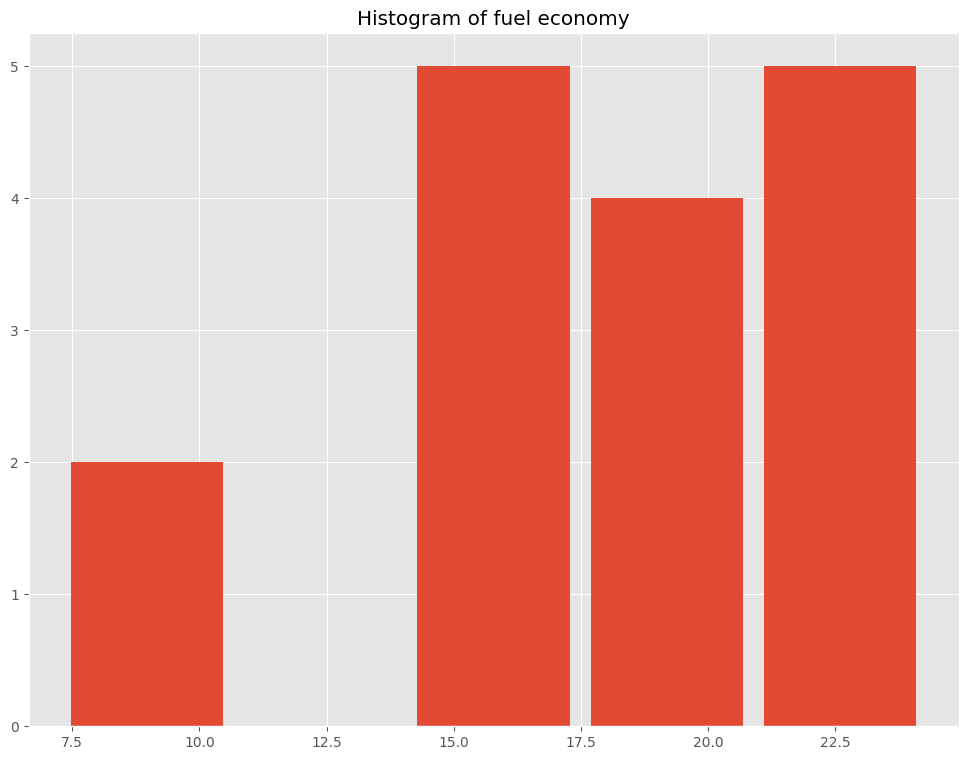

In [ ]:
# Ensure that histogram_MPG is in the form of a tuple containing bins and counts
# If it is already a tuple of two elements (bins, counts), we can convert it to a DataFrame
histogram_MPG_df = (
    spark
    .createDataFrame(
        [(bins, counts) for bins, counts in zip(histogram_MPG[0], histogram_MPG[1])],
        ['bins', 'counts']
    )
)

# Now convert the Spark DataFrame to a pandas DataFrame
histogram_MPG_pd = histogram_MPG_df.toPandas()

# Now, you can plot using the pandas DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1, 1, 1)

# Plot the histogram
ax.bar(histogram_MPG_pd['bins'], histogram_MPG_pd['counts'], width=3)

# Set the title
ax.set_title('Histogram of fuel economy')

# Show the plot
plt.show()


In [ ]:
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.io import output_notebook
import pandas as pd

# Convert the Spark DataFrame to a pandas DataFrame
histogram_MPG_pd = histogram_MPG_df.toPandas()

# Prepare labels for the x-axis as strings
labels = [str(round(e, 2)) for e in histogram_MPG_pd['bins']]

# Output to the notebook
output_notebook()

# Create a figure with labels on the x-axis
p = figure(
    x_range=labels,
    height=350,  # Corrected attribute from plot_height to height
    title='Histogram of Fuel Economy'
)

# Create vertical bars (vbar) based on the bins and counts
p.vbar(x=labels, top=histogram_MPG_pd['counts'], width=0.9)

# Show the plot
show(p)


Relations between features


In [ ]:
scatter = (
    no_outliers
    .select('Displacement', 'Cylinders')
)

scatter.registerTempTable('scatter')

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


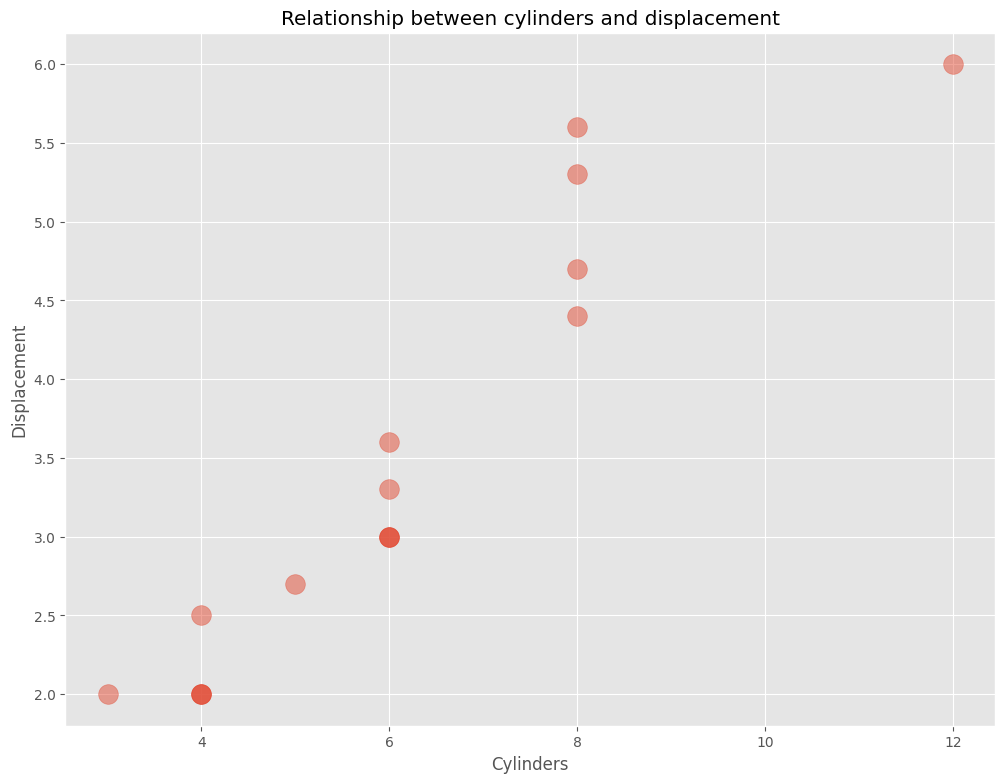

In [ ]:
# Select the relevant columns
scatter = (
    no_outliers
    .select('Displacement', 'Cylinders')
    .toPandas()  # Convert to a Pandas DataFrame for plotting
)

# Import required libraries for plotting
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the figure and axis
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1, 1, 1)

# Scatter plot
ax.scatter(
      scatter['Cylinders'],  # X-axis: Cylinders
      scatter['Displacement'],  # Y-axis: Displacement
      s=200,  # Size of the points
      alpha=0.5  # Transparency of the points
)

# Set labels and title
ax.set_xlabel('Cylinders')
ax.set_ylabel('Displacement')
ax.set_title('Relationship between cylinders and displacement')

# Show the plot
plt.show()


In [ ]:
# Import the necessary Bokeh libraries
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.io import output_notebook
output_notebook()

# Create the Bokeh plot
p = figure(title='Relationship between cylinders and displacement')
p.xaxis.axis_label = 'Cylinders'
p.yaxis.axis_label = 'Displacement'

# Use the correct variable `scatter` and plot the data
p.circle(
    list(scatter['Cylinders']),  # x-axis: Cylinders
    list(scatter['Displacement']),  # y-axis: Displacement
    fill_alpha=0.2,  # Transparency of the points
    size=10  # Size of the points
)

# Display the plot
show(p)
